In [30]:
import bs4 as bs
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests
% matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use("ggplot")

In [8]:
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
        
    return tickers

save_sp500_tickers()

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BHF',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CE',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS

In [2]:
def get_data_from_yahoo(reload_sp500=False):
    
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
        
    start = dt.datetime(2014,1,1)
    end = dt.datetime(2018,12,31)
    
    for ticker in tickers:
        print(ticker)
        try:
            if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            
            else:
                print('Already have {}'.format(ticker))
        except Exception:
            pass
            
get_data_from_yahoo()

MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AMG
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
AGN
ADS
LNT
ALL
GOOGL
GOOG
MO
AMZN
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
APC
ADI
ANSS
ANTM
AON
AOS
APA
AIV
AAPL
AMAT
APTV
ADM
ARNC
ANET
AJG
AIZ
T
ADSK
ADP
AZO
AVB
AVY
BHGE
BLL
BAC
BK
BAX
BBT
BDX
BRK.B
BBY
BIIB
BLK
HRB
BA
BKNG
BWA
BXP
BSX
BHF
BMY
AVGO
BR
BF.B
CHRW
COG
CDNS
CPB
COF
CPRI
CAH
KMX
CCL
CAT
CBOE
CBRE
CBS
CE
CELG
CNC
CNP
CTL
CERN
CF
SCHW
CHTR
CVX
CMG
CB
CHD
CI
XEC
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
CXO
COP
ED
STZ
COO
CPRT
GLW
COST
COTY
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DOV
DWDP
DTE
DRE
DUK
DXC
ETFC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ETR
EOG
EFX
EQIX
EQR
ESS
EL
EVRG
ES
RE
EXC
EXPE
EXPD
EXR
XOM
FFIV
FB
FAST
FRT
FDX
FIS
FITB
FE
FRC
FISV
FLT
FLIR
FLS
FLR
FMC
FL
F
FTNT
FTV
FBHS
BEN
FCX
GPS
GRMN
IT
GD
GE
GIS
GM
GPC
GILD
GPN
GS
GT
GWW
HAL
HBI
HOG
HRS
HIG
HAS
HCA
HCP
HP
HSIC
HSY
HES
HPE
HLT
HFC
HOLX
HD
HON
HR

In [18]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        try:
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index("Date", inplace=True)
        
            df.rename(columns={"Adj Close": ticker}, inplace=True)
            df.drop(["Open","High", "Low", "Close", "Volume"], 1, inplace=True)
        
            if main_df.empty:
                main_df = df
            else:
                main_df = main_df.join(df, how="outer")

            if count % 25 == 0:
                print(count)
        
        except Exception:
            pass

    print(main_df.head())
    main_df.to_csv("sp500_joined_closes.csv")
        
    
        
compile_data()       

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
                   MMM        ABT       ABBV       ABMD        ACN       ATVI  \
Date                                                                            
2014-01-02  121.803711  34.278893  43.585617  26.850000  72.275024  17.377026   
2014-01-03  122.085938  34.646519  43.853947  27.059999  72.515541  17.588593   
2014-01-06  121.362839  35.103809  42.252399  27.299999  71.749413  17.386644   
2014-01-07  121.380447  34.834820  42.336254  27.620001  72.622467  17.617439   
2014-01-08  120.481033  35.148636  42.227245  28.230000  73.183693  17.636671   

                 ADBE   AMD         AAP        AES    ...            WLTW  \
Date                                                  ...                   
2014-01-02  59.290001  3.95  108.796555  11.899640    ...      109.371323   
2014-01-03  59.160000  4.00  111.909538  11.841269    ...      108.381096   
2014-01-06  58.119999  4.13  110.838829  11.9

<IPython.core.display.Javascript object>


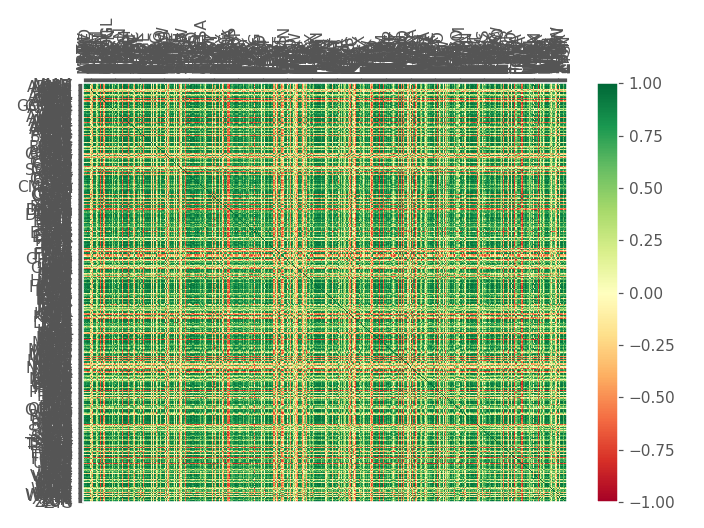

In [31]:
def visualize_data():
    df = pd.read_csv("sp500_joined_closes.csv")
    df_corr = df.corr()
    
#     df_corr.to_csv("sp500_correlation.csv") 
#     print(df_corr.head())

    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data,cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show
    
visualize_data()    